In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [5]:
#import modules
import pandas as pd #olah dan analisis data #olah dan analisis data

In [7]:
heart_df = pd.read_csv ('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv') # memuat file csv sebagai data frame
heart_df.head () # tampilkan 5 baris pertama

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [93]:
#drop column id
#iris_df = iris_df.drop(columns='id')
heart_df.drop(columns='caa', inplace=True) # menghapus kolom 'Glocuse'
heart_df.head() # tampilkan 45 baris pertama

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,2
3,56,1,1,120,236,0,1,178,0,0.8,2,2
4,57,0,0,120,354,0,1,163,1,0.6,2,2


In [95]:
#identify the shape of the dataset
heart_df.shape #bentuk/dimensi dataset (baris, kolom)

(303, 12)

In [96]:
#get the list of columss
heart_df.columns #daftar data untuk setiap kolom

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'thall'],
      dtype='object')

In [97]:
#get bassic dataset information
heart_df.dtypes # tipedata untuk tiap kolom

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
thall         int64
dtype: object

In [98]:
#get bassic dataset information
heart_df.info #informasi dataset 

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     thall  
0     

In [99]:
#identify missing values
#iris_df.insull()values.any()
heart_df.isna().values.any() #mendeteksi keberadaan nilai kosong

False

In [100]:
#identify duplicate entries / rows
#iris_df[iris_df.duplicated(keep=false)] #tampilkan seluruh baris dengan duplikasi
heart_df[heart_df.duplicated()] #tampilkan hanya baris duplikasi sekunder

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,thall
164,38,1,2,138,175,0,1,173,0,0.0,2,2


In [101]:
heart_df.duplicated().value_counts() # hitung jumlah duplikasi data

False    302
True       1
dtype: int64

In [102]:
#drop duplicate entries/rows
heart_df.drop_duplicates(inplace=True) #menghapus duplikasi data
heart_df.shape # melihat dimensi data

(302, 12)

# **Describe the dataset**

In [103]:
heart_df.describe() #deskripsi data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,thall
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,2.314570
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.613026
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,2.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,2.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,3.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000


In [104]:
#correlation matrix
heart_df.corr() #kolerasi antar kolom

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,thall
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.065317
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.211452
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.160370
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.062870
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.096810
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,-0.032752
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.010473
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.094910
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.205826
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.209090


In [107]:
#iris dataset: data visualisation
import matplotlib.pyplot as plt #visualsisai data
import seaborn as sns #visualisasi data

#output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline

In [108]:
#iris dataset = classification models
#import modules
from sklearn.model_selection import train_test_split# pembagi dataset menjadi training
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model
        

In [109]:
#dataset:features & class label
X = heart_df.drop(columns='exng') # menempatkan featrues ke dalam variable x
X.head() #tampilkan 5 baris pertama

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,oldpeak,slp,thall
0,63,1,3,145,233,1,0,150,2.3,0,1
1,37,1,2,130,250,0,1,187,3.5,0,2
2,41,0,1,130,204,0,0,172,1.4,2,2
3,56,1,1,120,236,0,1,178,0.8,2,2
4,57,0,0,120,354,0,1,163,0.6,2,2


In [110]:
y = heart_df ['exng']
y.head() # tampilkan 5 baris pertama

0    0
1    0
2    0
3    0
4    1
Name: exng, dtype: int64

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset')
print(X_test.shape)
print(y_test.shape)

training dataset
(241, 11)
(241,)

testing dataset
(61, 11)
(61,)


# k-nearest neighbors algorithm

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd

# load dataset
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

# split dataset into features and target variable
X = df.drop('exng', axis=1)
y = df['exng']

# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [115]:
model_knn = KNeighborsClassifier(n_neighbors=3) #konfigurasi algoritma
model_knn.fit(X_train,y_train) #traning model/classifier
y_pred = model_knn.predict(X_test) #melakukan prediksi

In [116]:
# Menentukan jangkauan nilai k yang akan diuji
k_range = list(range(1, 26))

# Melakukan klasifikasi untuk setiap nilai k dan menyimpan hasilnya
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

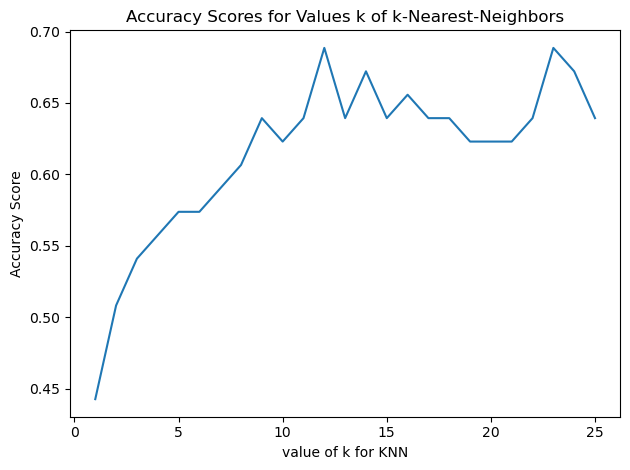

In [225]:
import matplotlib.pyplot as plt

# definisikan k_range dan scores terlebih dahulu

plt.plot(k_range, scores)
plt.xlabel('value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [117]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.639344262295082


In [118]:
#classification report
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        38
           1       0.54      0.30      0.39        23

    accuracy                           0.64        61
   macro avg       0.60      0.57      0.57        61
weighted avg       0.62      0.64      0.61        61



In [121]:
#confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[32  6]
 [16  7]]


# Logistic regression algorithm


In [124]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# load dataset
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [125]:
# create a logistic regression model and fit it to the training data
model_logreg = LogisticRegression(max_iter=10000, solver='lbfgs')
model_logreg.fit(X_train, y_train)
# make predictions on the testing set
y_pred = model_logreg.predict(X_test)

In [126]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7049180327868853


In [127]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[31  7]
 [11 12]]


In [128]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        38
           1       0.63      0.52      0.57        23

    accuracy                           0.70        61
   macro avg       0.68      0.67      0.67        61
weighted avg       0.70      0.70      0.70        61



# support vector machine classifier algorithm (SVM)

In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# load dataset
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

# split the dataset into features (X) and target (y)
X = df.drop('slp', axis=1)
y = df['slp']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a SVM classifier model and fit it to the training data
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_svm.predict(X_test)

In [175]:
#support vector classifier (model SVM)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [176]:
#model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
model_svc = model_svc.predict(X_test)

In [177]:
# generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         6
           1       0.72      0.43      0.54        30
           2       0.65      0.88      0.75        25

    accuracy                           0.62        61
   macro avg       0.57      0.60      0.56        61
weighted avg       0.65      0.62      0.61        61



In [178]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 3  2  1]
 [ 6 13 11]
 [ 0  3 22]]


# Decision tree classifier algorithm

In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# load dataset
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

# split the dataset into features (X) and target (y)
X = df.drop('cp', axis=1)
y = df['cp']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
# create a Decision Tree classifier model and fit it to the training data
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

In [183]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[18  2  9  4]
 [ 1  2  6  0]
 [ 5  1  5  2]
 [ 2  0  1  3]]


In [184]:
# generate classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.55      0.61        33
           1       0.40      0.22      0.29         9
           2       0.24      0.38      0.29        13
           3       0.33      0.50      0.40         6

    accuracy                           0.46        61
   macro avg       0.42      0.41      0.40        61
weighted avg       0.52      0.46      0.47        61



# **Random Forest Classifier Algorithm**

In [ ]:
#decision tree classifier (DT)
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#model_rf = randomforestclassifier
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)

In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# load dataset
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

# split the dataset into features (X) and target (y)
X = df.drop('fbs', axis=1)
y = df['fbs']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest classifier model and fit it to the training data
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model_rf.predict(X_test)

In [187]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[44  3]
 [14  0]]


In [188]:
# generate classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.94      0.84        47
           1       0.00      0.00      0.00        14

    accuracy                           0.72        61
   macro avg       0.38      0.47      0.42        61
weighted avg       0.58      0.72      0.65        61



# Accuracy comprasion for various models

In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

# Split the dataset into features and target
X = df.drop("slp", axis=1)
y = df["slp"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

# Train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

# Train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Train the support vector machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

In [222]:
# initialize models
model_knn = KNeighborsClassifier()
model_logreg = LogisticRegression()
model_svc = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

# fit each model to the training data
model_knn.fit(X_train, y_train)
model_logreg.fit(X_train, y_train)
model_svc.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [223]:
#accuracy comparision for various models.
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.6885245901639344, 0.639344262295082, 0.7213114754098361, 0.5901639344262295, 0.7377049180327869]


# accuracy comprasion for various models with matplotlib

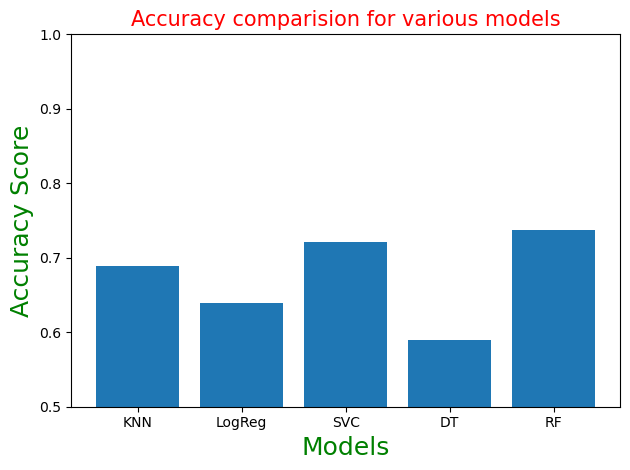

In [224]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.5,1)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()